In [1]:
from typing_extensions import TypedDict

In [2]:
class State(TypedDict):
    aggregate: list

In [3]:
def node_a(state: State):
    return {"aggregate": ["data 1"]}

def node_b(state: State):
    return {"aggregate": ["data 2"]}

def node_c(state: State):
    return {"aggregate": ["data 3"]}

def node_d(state: State):
    return {"aggregate": ["data 4"]}

In [4]:
from langgraph.graph import StateGraph, START, END

In [5]:
graph = (
    StateGraph(State)

    .add_node("a", node_a)
    .add_node("b", node_b)
    .add_node("c", node_c)
    .add_node("d", node_d)

    .add_edge(START, "a")
    .add_edge("a", "b")
    .add_edge("b", "c")
    .add_edge("c", "d")
    .add_edge("d", END)

    .compile()
)

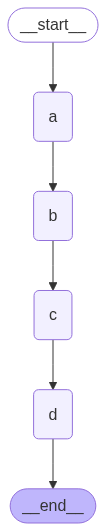

In [6]:
from IPython.display import Image, display
diagram = Image(graph.get_graph().draw_mermaid_png())

display(diagram)

In [7]:
out = graph.invoke(
    {
        "aggregate":[]
    }
)

In [8]:
out

{'aggregate': ['data 4']}

### state2

In [12]:
from typing import Annotated
from typing_extensions import TypedDict
import operator

class State(TypedDict):
    aggregate: Annotated[list, operator.add]

In [13]:
def node_a(state: State):
    return {"aggregate": ["data 1"]}

def node_b(state: State):
    return {"aggregate": ["data 2"]}

def node_c(state: State):
    return {"aggregate": ["data 3"]}

def node_d(state: State):
    return {"aggregate": ["data 4"]}

In [14]:
from langgraph.graph import StateGraph, START, END

In [15]:
graph = (
    StateGraph(State)

    .add_node("a", node_a)
    .add_node("b", node_b)
    .add_node("c", node_c)
    .add_node("d", node_d)

    .add_edge(START, "a")
    .add_edge("a", "b")
    .add_edge("b", "c")
    .add_edge("c", "d")
    .add_edge("d", END)

    .compile()
)

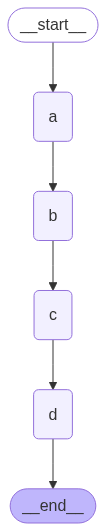

In [16]:
from IPython.display import Image, display
diagram = Image(graph.get_graph().draw_mermaid_png())

display(diagram)

In [17]:
out = graph.invoke(
    {
        "aggregate":[]
    }
)

In [18]:
out

{'aggregate': ['data 1', 'data 2', 'data 3', 'data 4']}

### state 3

In [20]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

class State(TypedDict):
    aggregate: Annotated[list, add_messages]

In [21]:
def node_a(state: State):
    return {"aggregate": ["data 1"]}

def node_b(state: State):
    return {"aggregate": ["data 2"]}

def node_c(state: State):
    return {"aggregate": ["data 3"]}

def node_d(state: State):
    return {"aggregate": ["data 4"]}

In [22]:
from langgraph.graph import StateGraph, START, END

In [23]:
graph = (
    StateGraph(State)

    .add_node("a", node_a)
    .add_node("b", node_b)
    .add_node("c", node_c)
    .add_node("d", node_d)

    .add_edge(START, "a")
    .add_edge("a", "b")
    .add_edge("b", "c")
    .add_edge("c", "d")
    .add_edge("d", END)

    .compile()
)

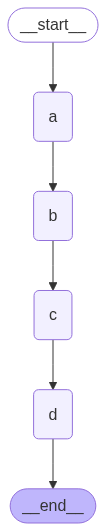

In [24]:
from IPython.display import Image, display
diagram = Image(graph.get_graph().draw_mermaid_png())

display(diagram)

In [25]:
out = graph.invoke(
    {
        "aggregate":[]
    }
)

In [26]:
out

{'aggregate': [HumanMessage(content='data 1', additional_kwargs={}, response_metadata={}, id='56de2f7f-82e1-4e07-b7a6-e1132504f994'),
  HumanMessage(content='data 2', additional_kwargs={}, response_metadata={}, id='4821506d-e9d5-4bd9-89c5-bad56dcfe245'),
  HumanMessage(content='data 3', additional_kwargs={}, response_metadata={}, id='9c5c0639-5b48-4eba-8496-6de7a2e79571'),
  HumanMessage(content='data 4', additional_kwargs={}, response_metadata={}, id='e017327c-bfd0-4f6b-b20c-8298d88ee17d')]}

In [27]:
for msg in out["aggregate"]:
    msg.pretty_print()

================================ Human Message =================================

data 1
================================ Human Message =================================

data 2
================================ Human Message =================================

data 3
================================ Human Message =================================

data 4


### state4

In [33]:
from langgraph.graph import MessagesState

In [35]:
def node_a(state: MessagesState):
    return {"messages": ["data 1"]}

def node_b(state: MessagesState):
    return {"messages": ["data 2"]}

def node_c(state: MessagesState):
    return {"messages": ["data 3"]}

def node_d(state: MessagesState):
    return {"messages": ["data 4"]}

In [36]:
from langgraph.graph import StateGraph, START, END

In [38]:
graph = (
    StateGraph(MessagesState)

    .add_node("a", node_a)
    .add_node("b", node_b)
    .add_node("c", node_c)
    .add_node("d", node_d)

    .add_edge(START, "a")
    .add_edge("a", "b")
    .add_edge("b", "c")
    .add_edge("c", "d")
    .add_edge("d", END)

    .compile()
)

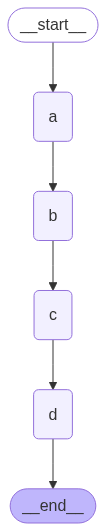

In [39]:
from IPython.display import Image, display
diagram = Image(graph.get_graph().draw_mermaid_png())

display(diagram)

In [40]:
out = graph.invoke(
    {
        "messages":[]
    }
)

In [41]:
for msg in out["messages"]:
    msg.pretty_print()

================================ Human Message =================================

data 1
================================ Human Message =================================

data 2
================================ Human Message =================================

data 3
================================ Human Message =================================

data 4
